In [1]:
import numpy as np
import h5py
import sys
sys.path.insert(0,'..')
from pygwb.statistical_checks import StatisticalChecks

# Statistical checks: a first introduction

In this tutorial, an overview of the statistical checks module of pyGWB is provided. More specifically, we will cover the initializiation of the class, as well as the various outputs of the class methods.

There are various ways to initialze the statistical checks module:
- Directly providing the required input.
- Reading in a baseline object saved to a pickle file
- Reading in the required input that was previously saved to a file (pickle or hdf5)

We will briefly cover each of these options below.

## Direct initialization of statistical checks module

The direct initialization of the statistical checks module requires the following input:
- GPS times
- Sliding point estimates
- Sliding sigmas
- Naive sigmas
- Sensitivity integrand
- Point estimate integrand
- Frequencies (might be changed)
- Bad GPS times
- Delta sigma values
- Directory where the plots will be saved
- Name of the baseline
- Path to parameter file with parameters used during the analysis run

In [ ]:
#Add more here. Maybe fake arrays for each of the quantities above?

Furthermore, a path to the parameters that were used during the analysis needs to be provided. This file includes the segment duration, the frequency resolution, etc.:

In [ ]:
param_file = ""

In addition, the statistical checks module produces a series of plots that will be saved in a directory specified by the user:

In [ ]:
plot_dir = ""

In [ ]:
#Add necessary input

In [ ]:
statistical_checks_direct_ini = StatisticalChecks(sliding_times_all, sliding_omega_all, sliding_sigmas_all, naive_sigma_all, sensitivity_integrand, point_estimate_integrand, freqs, badGPSTimes, delta_sigmas, plot_dir, baseline_name, param_file)

As mentioned previously, the goal of the statistical checks module is to create a series of plots that illustrate various quantities of the analysis and check these quantities for consistency. One can choose to generate one of these plots separately by calling the correspoding method (after which it will be saved to the directory specified above). For example, if one wants to look at the running poitn estimate, one would call:

In [ ]:
statistical_checks_direct_ini.plot_running_point_estimate()

If instead, one wants to generate all the plots from the statistical checks module, one calls:

In [ ]:
statistical_checks_direct_ini.generate_all_plots()

The above steps illustrate how to use the statistical checks module. We will now cover the initialization though baseline pickle file and other types of files. The generation of plots will not be covered anymore, as it is identical to what was done in this part of the tutorial.

## Initialization through baseline pickle file

The baseline object forms a key aspect of the pyGWB package. This object will contain the results of a pyGWB analysis run and can be saved to a pickle file. This baseline pickle file can then be read in to initialize the statistical checks module. The path to such a file needs to be specified, e.g.:

In [ ]:
baseline_file_pickle = ""

As in the previous cases, both a path to the parameter file used for the analysis and a path where the output of the statistical checks will be saved need to be provided:

In [ ]:
param_file = ""
plot_dir = ""

One can then initialize a statistical checks object as follows:

In [ ]:
statistical_checks_from_baseline = StatisticalChecks.from_baseline_pickle(baseline_file_pickle, param_file, plot_dir)

Note that, as mentioned previously, the steps to generate (part of) the plots is identical to what was done in the previous part of the tutorial. This will therefore not be covered again. We now proceed to the initialization through pickle or hdf5 file.

## Initialization through pickle or hdf5 file

Since the initialization through pickle or hdf5 file is similar, we will only cover the hdf5 case. For pickle files, one just needs to pass the paths to the pickle files and initialize the statistical checks in the same way as below.

We start by providing two paths: one to the file containing PSDs and CSDs, and the other that contains all the necessary input such as a point estimate and sigma spectrogram, the bad GPS times, the values of the delta sigma cut, etc.:

In [ ]:
hdf5_file_PSD = ""
hdf5_file_point_estimate = ""

In addition, the name of the baseline needs to be specified: 

In [ ]:
baseline_name = "H1L1"

Another input in this case is the overlap reduction function, which needs to be passed as an gwpy.frequencyseries:

In [ ]:
orf = gwpy.frequencyseries.FrequencySeries(...) #Needs to be filled in

As in the previous cases, both a path to the parameter file used for the analysis and a path where the output of the statistical checks will be saved need to be provided:

In [ ]:
param_file = ""
plot_dir = ""

The statistical checks class is then initialized as follows:

In [ ]:
#To be checked if we end up writing a 'from_file' method

In [ ]:
statistical_checks_from_file = StatisticalChecks.from_file(hdf5_file_point_estimate, hdf5_file_PSD, param_file, plot_dir, baseline_name, orf)

As producing the statistical checks plots is analogous to what has been done in the first part of the tutorial, this concludes the tutorial. We now move on to the comparison of the stochastic.m and pyGWB statistical checks results.

# Comparing Matlab results of statistical checks to pyGWB

## Matlab results

As a further test of the pyGWB statistical checks module, we consider the results produced by the stochastic.m (Matlab) code for the GPS times 1241280019-1242489618 for the HL baseline during O3. The results of the statistical checks as done by stochastic.m can be found [here](https://git.ligo.org/stochastic/isotropic-o3a/-/blob/master/time_shifted_runs/1241280019-1242489618_v1/HL/isotropic_results.md). To be able to compare to the output of the stochastic.m code, we first import these results and initialize the pyGWB statistical checks class with this imported data.

In [2]:
mat_dir = "/home/irina.dvorkin/StochRepo/isotropic-o3a/time_shifted_runs/1241280019-1242489618_v1/HL/output/mats/"
pproc_dir = "/home/irina.dvorkin/StochRepo/isotropic-o3a/time_shifted_runs/1241280019-1242489618_v1/HL/pproc/a0/"
plot_dir = '/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/tutorials/plots/'
param_file = "/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/test/test_data/parameters_test.ini"

In [14]:
njobs = 47
segment_duration = 192
deltaF = 0.03125
dsc = 0.2
sampling_frequency = 1024
segs = segment_duration * deltaF * 2 - 1
deltaT = 1 / sampling_frequency
baseline_name = "H1L1"
read_bad_times = True

In [15]:
sliding_omega_all = np.array([])
sliding_sigmas_all = np.array([])
naive_sigma_all = np.array([])
sliding_times_all = np.array([])
for nn in range(njobs):
    jn = nn + 1
    file1 = "%sH1L1.job%d.mat" % (mat_dir, jn)
    with h5py.File(file1, "r") as FF:
        try:
            sliding_omega_all = np.append(
                sliding_omega_all,
                np.array(FF["ccStat"][0]).flatten() / segment_duration,
            )
            sliding_sigmas_all = np.append(
                sliding_sigmas_all,
                np.array(FF["ccSigma"][0]).flatten() / segment_duration,
            )
            naive_sigma_all = np.append(
                naive_sigma_all,
                np.array(FF["naiSigma"][0]).flatten() / segment_duration,
            )
            sliding_times_all = np.append(
                sliding_times_all, np.array(FF["segmentStartTime"][0]).flatten()
            )
        except:
            print("No data for job %u" % jn)
            continue
delta_sigmas = (np.abs(naive_sigma_all - sliding_sigmas_all)/ naive_sigma_all)

No data for job 25


In [16]:
file_bad = open(f"{pproc_dir[:-3]}badGPSTimes.dat", "r")
lines_bad = file_bad.readlines()
badGPSTimes = np.array([])
for line in lines_bad:
    temp = line.strip("\n")
    badGPSTimes = np.append(badGPSTimes, np.array([float(temp)]))

In [17]:
filename_pt = pproc_dir + baseline_name + "_ptEstIntegrand.dat"
point_estimate_integrand = np.genfromtxt(filename_pt, comments="%")
freqs=point_estimate_integrand[:, 1]
point_estimate_integrand=point_estimate_integrand[:,2]+1j*point_estimate_integrand[:,3]

In [18]:
filename_sens = pproc_dir + baseline_name + "_sensIntegrand.dat"
sensitivity_integrand = np.genfromtxt(filename_sens, comments="%")
sensitivity_integrand = sensitivity_integrand[:,2]

In [10]:
stat_checks = StatisticalChecks(sliding_times_all, sliding_omega_all, sliding_sigmas_all, naive_sigma_all, sensitivity_integrand, point_estimate_integrand, freqs, badGPSTimes, delta_sigmas, plot_dir, baseline_name, param_file)

In [11]:
stat_checks.deltaT=1./sampling_frequency

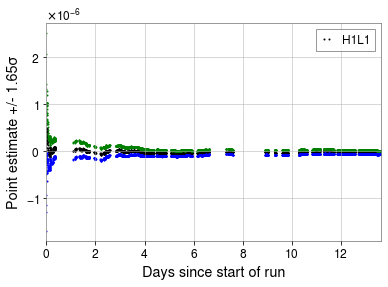

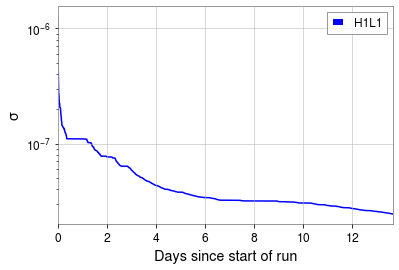

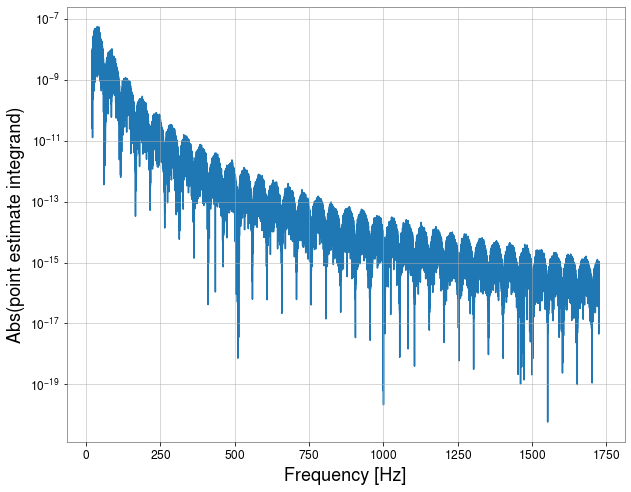

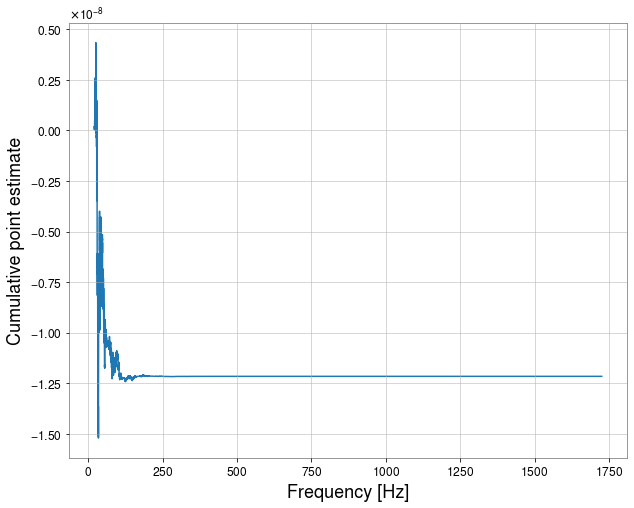

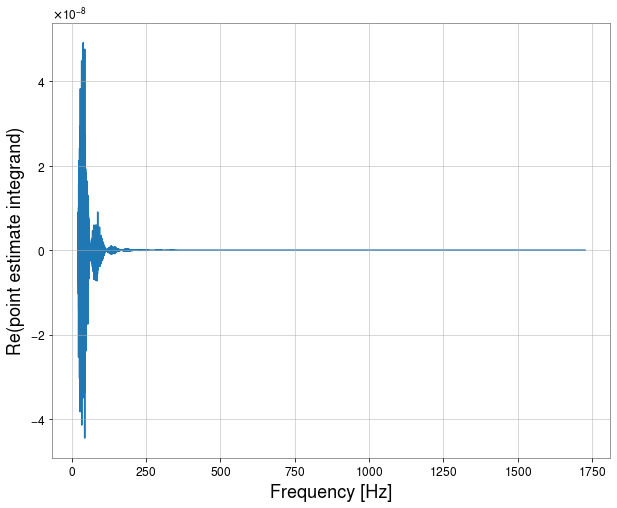

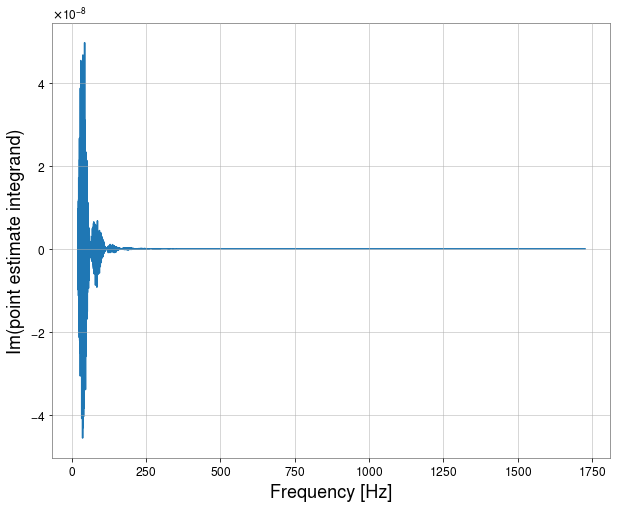

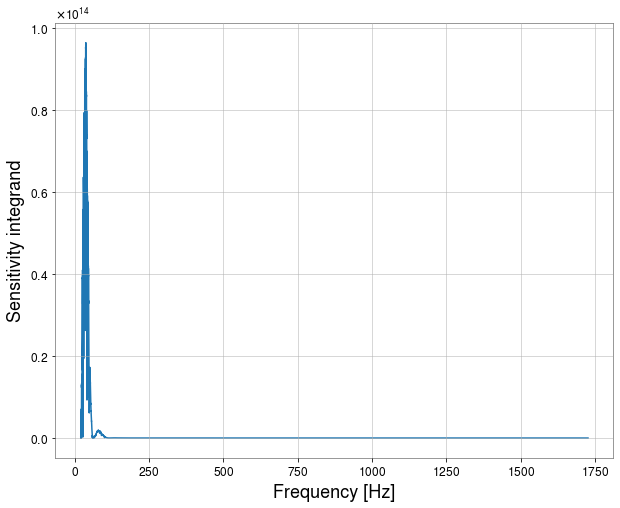

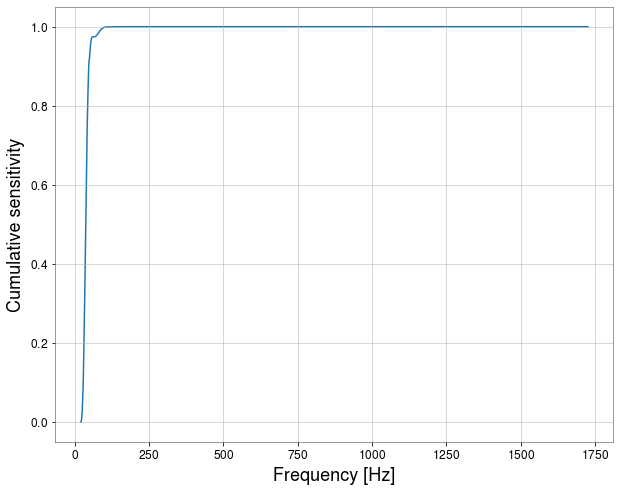

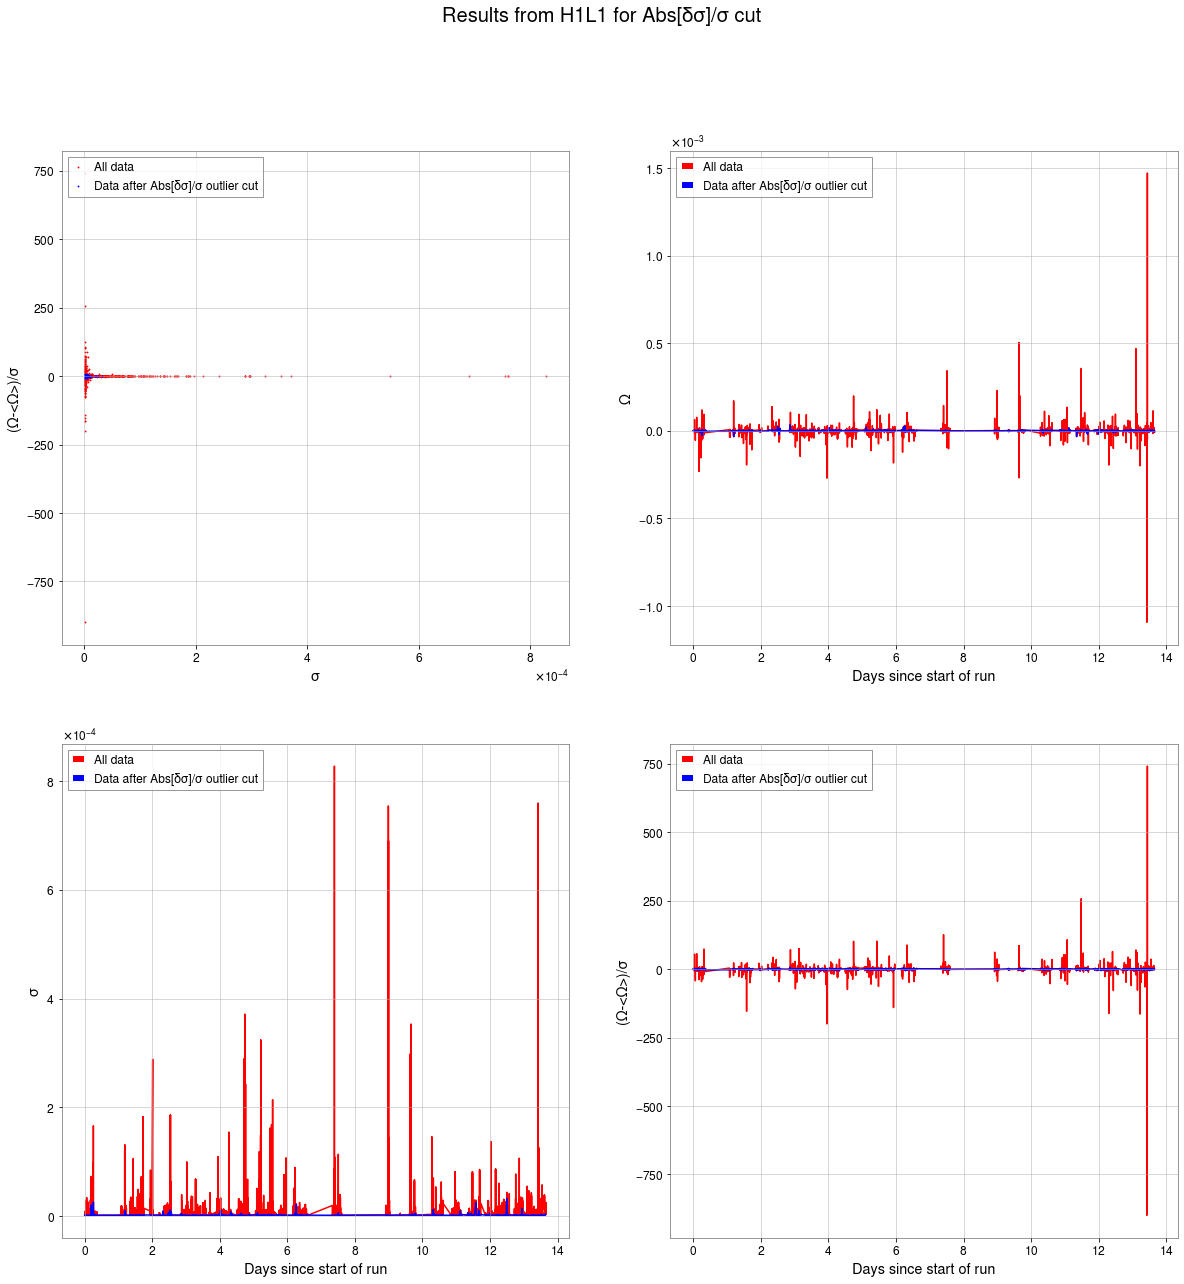

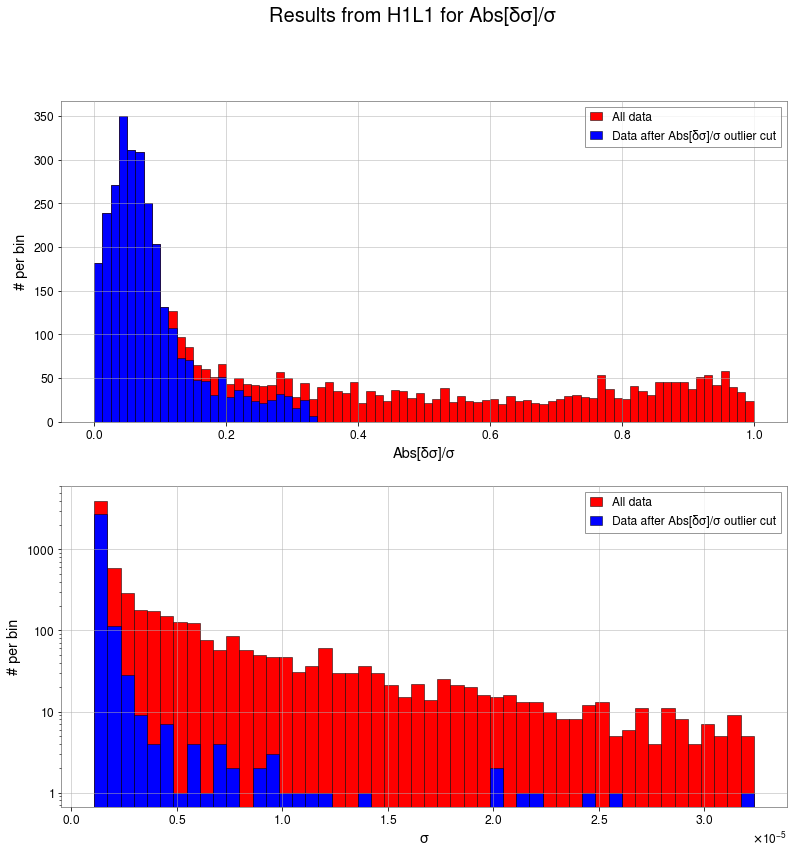

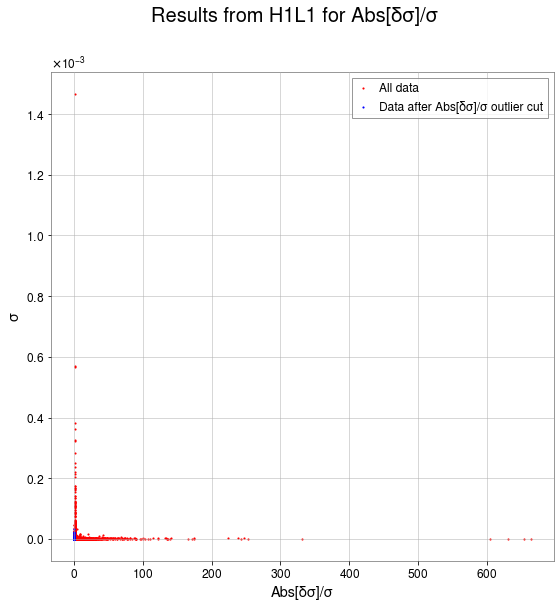

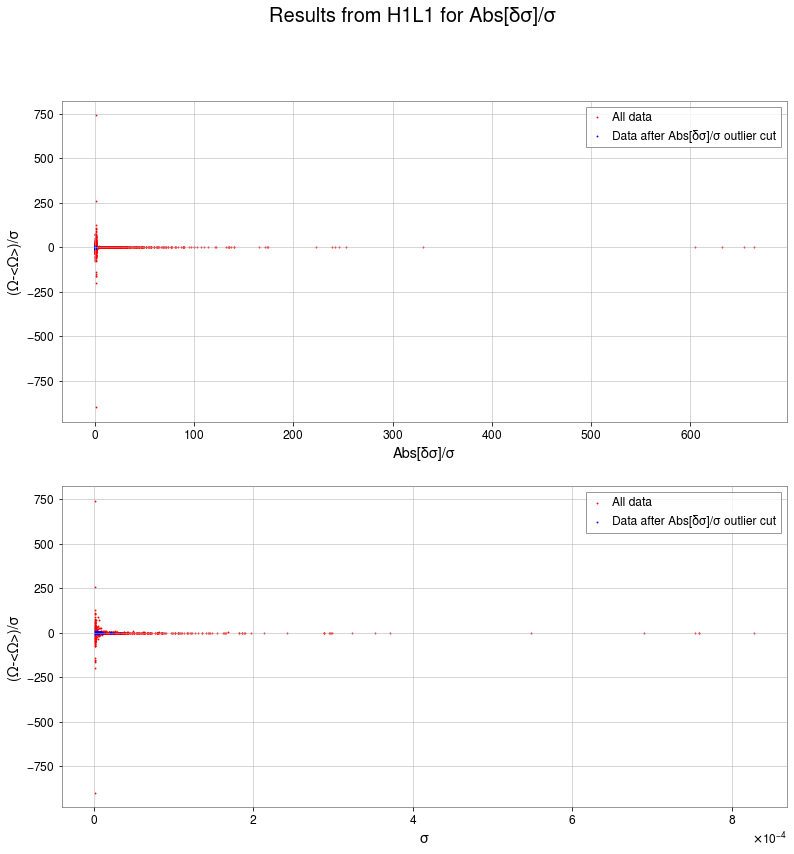

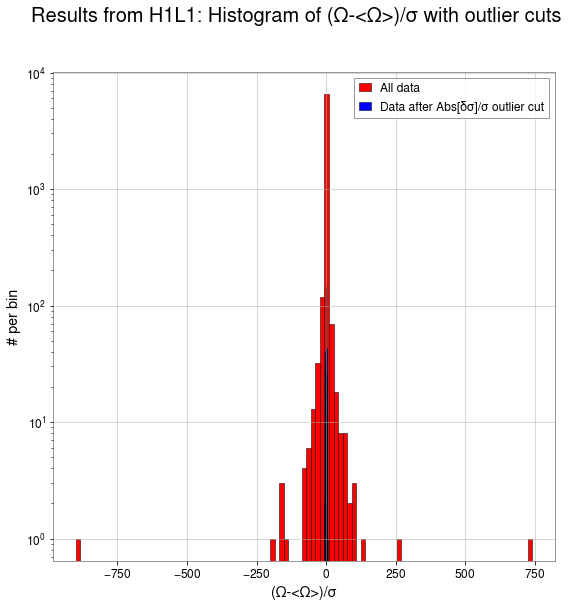

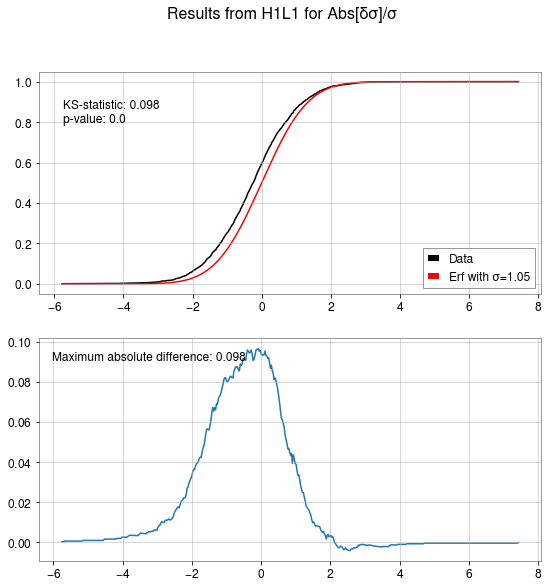

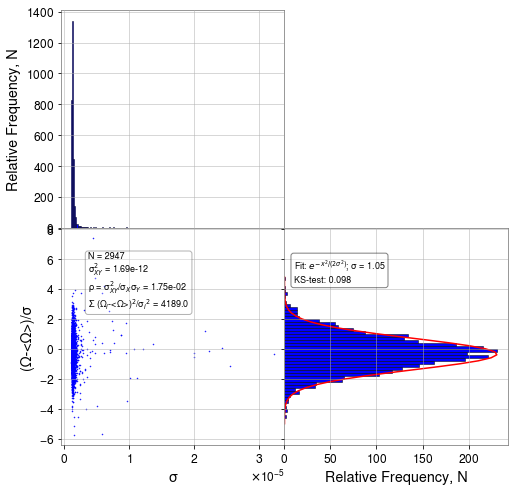

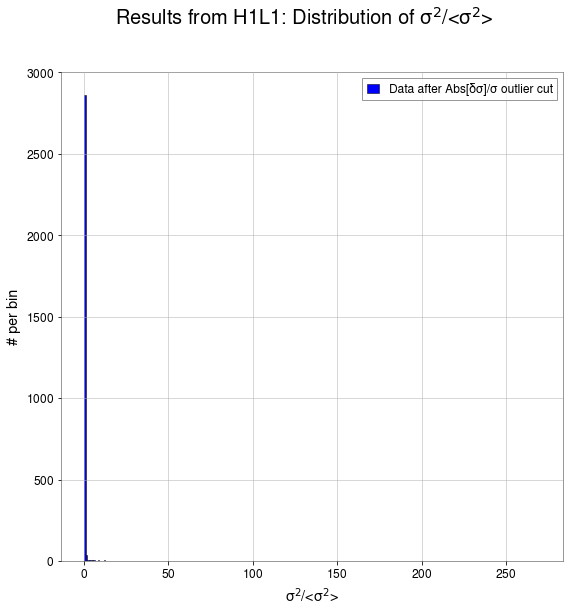

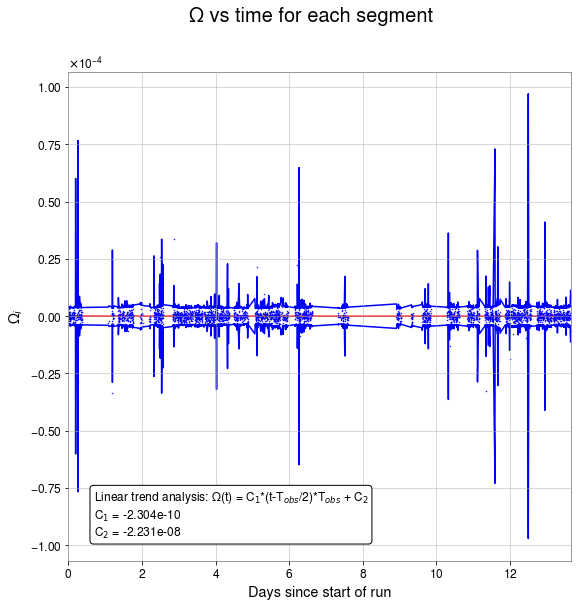

In [12]:
stat_checks.generate_all_plots()

## Statistical checks using pyGWB

In [ ]:
# Add more